Testing Adam model...
1/1 ━━━━━━━━━━━━━━━━━━━━ 83s 83s/step


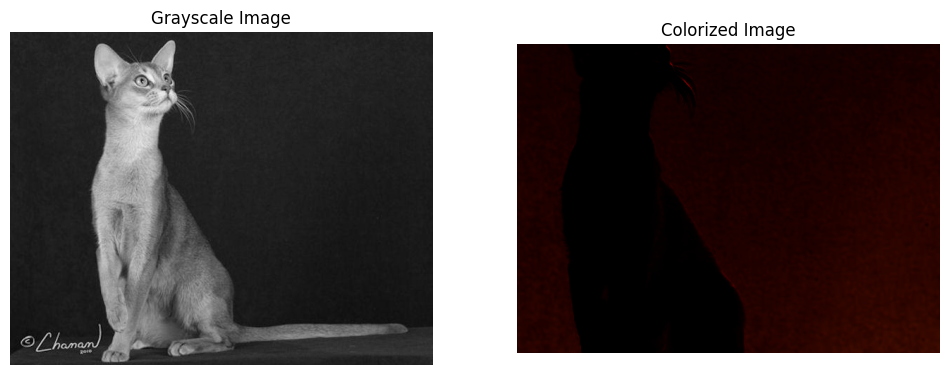

Testing SGD model...
1/1 ━━━━━━━━━━━━━━━━━━━━ 84s 84s/step


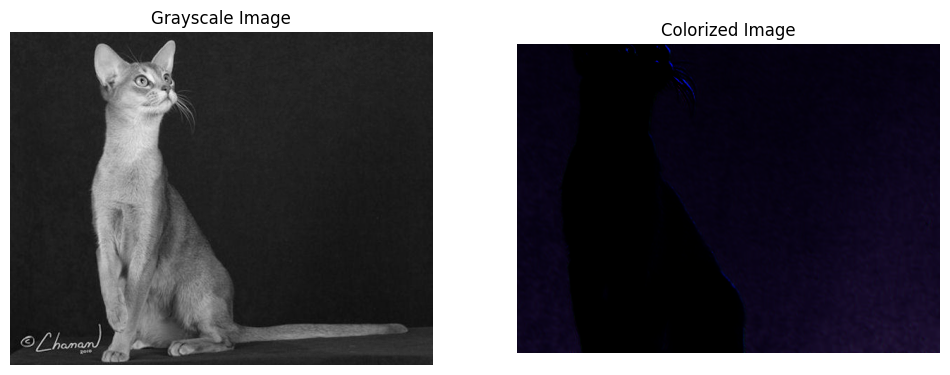

Testing RMSprop model...
1/1 ━━━━━━━━━━━━━━━━━━━━ 88s 88s/step


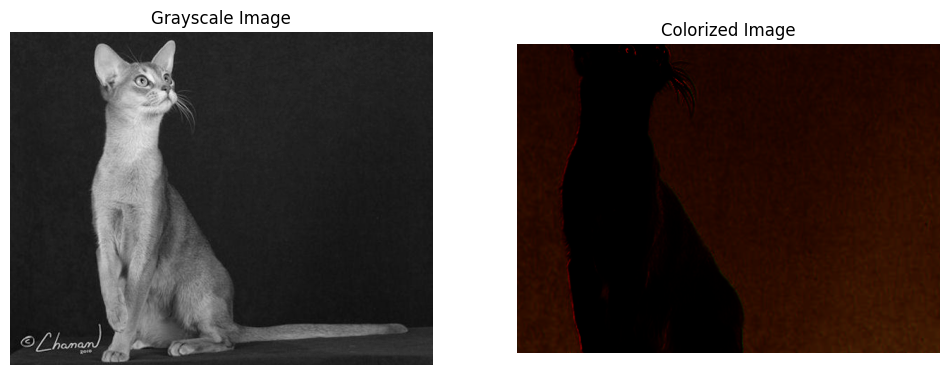

Testing full model...


1/1 ━━━━━━━━━━━━━━━━━━━━ 87s 87s/step


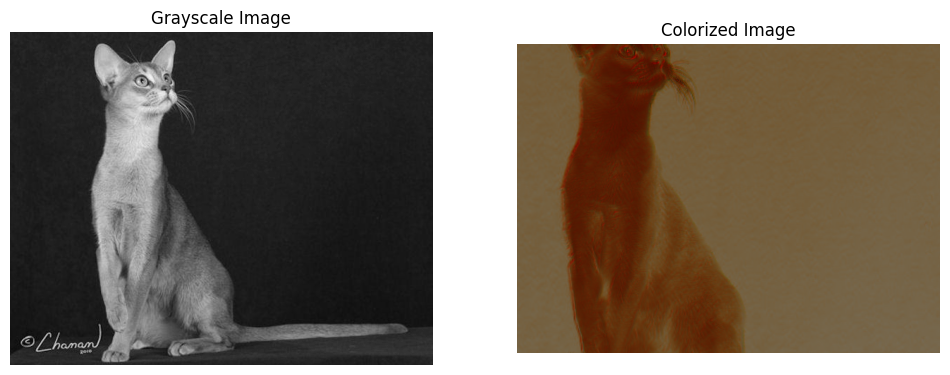

In [6]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Function to visualize the colorization result
def visualize_colorization(model, grayscale_image_path, transform):
    grayscale_image = Image.open(grayscale_image_path).convert('L')
    grayscale_tensor = transform(grayscale_image)
    
    colorized_tensor = model.predict(np.expand_dims(grayscale_tensor, axis=0))
    colorized_image = colorized_tensor.squeeze(0)
    
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(grayscale_image, cmap='gray')
    ax[0].set_title('Grayscale Image')
    ax[0].axis('off')
    
    ax[1].imshow(colorized_image)
    ax[1].set_title('Colorized Image')
    ax[1].axis('off')
    
    plt.show()

# Load the models
model_adam = load_model('colorization_model_Adam.h5')
model_sgd = load_model('colorization_model_SGD.h5')
model_rmsprop = load_model('colorization_model_RMSprop.h5')
model = load_model('colorization_model.h5')

# Example usage
grayscale_image_path = 'cv_p3_images_split/validation/grayscale/Abyssinian_2.jpg'
transform = tf.keras.preprocessing.image.img_to_array

print('Testing Adam model...')
visualize_colorization(model_adam, grayscale_image_path, transform)

print('Testing SGD model...')
visualize_colorization(model_sgd, grayscale_image_path, transform)

print('Testing RMSprop model...')
visualize_colorization(model_rmsprop, grayscale_image_path, transform)
print('Testing full model...')
visualize_colorization(model, grayscale_image_path, transform)
